# Implementing a Multilayer Artificial Neural Network from Scratch

As you may know, deep learning is getting a lot of attention from the press and is without any doubt the hottest topic in machine learning field. Deep learning can be understood as a set of algorithms that were developed to train artificial neural networks with many layers most efficiently. In this chapter, you will learn the basic concepts of artificial neural networks so that you will be well-equipped for the following chapters, which will introduce advanced Python-based deep learning libraries and **Deep Neural Networks (DNN)** architectures that are particularly well-suited for image and text-analyses.

The topics that we will cover in this chapter are as follows:

* Getting a conceptual understanding of multilayer neural networks
* Implementing the fundamental backpropagation algorithm for neural network training from scratch
* Training a basic multilayer neural network for image classfication

# Modeling complex functions with artificial neural networks

At the beginning of this book, we started our journey through machine learning algorithms with artificial neurons. Artificial neurons represent the building blocks of the multilayer artificial neural networks that we will discuss in this chapter. The basic concept behind artificial neural networks was built upon hypothesis and models of how the human brain works to solve complex problem tasks. Although artificial neural networks have gained a lot of popularity in recent years, early studies of neural networks go back to the 1940s when Warren McCulloch and Walter Pitt first described how neurons could work. 

However, in the decades that followed the first implementation of the **McCulloch-Pitt neuron** model - Rosenblatt's perceptron in the 1950s, many researchers and machine learning practitioners slowly began to lose interest in neural networks since no one had a good solution for training a neural network with multiple layers. Eventually, interest in neural networks was rekindled in 1986 when D.E. Rumelhart, G.E. Hinton, and R.J. Williams were involved in the (red)discovery and popularization of the backpropagation algorithm to train neural networks more efficiently, which we will discuss in more detail later in this chapter. Readers who are interested in the history of **Artificial Intelligence (AI)**, machine learning, and neural networks are also encouraged to read the Wikipedia article on *AI winter*, which are periods of time where a large portion of the research community lost interest in the study of neural networks. 

However, neural networks have never been as popular as they are today, thanks to the many major breakthroughs that have been made in the previous decade, which resulted in what we now call deep learning algorithms and architectures - neural networks that are composed of many layers. Neural networks are a hot topic not only in academic research but also in big technology companies such as Facebook, Microsoft, and Google, who invest heavily in artificial neural networks and deep learning research. As of today, complex neural networks powered by deep learning algorithms are considered state of the art when it comes to complex problem solving such as image and voice recognition. Popular examples of the products in our everyday life that are powered by deep learning are Google's image search and Google Translate - an application for smartphones than can automatically recognize text in images for real-time translation into more than 20 languages. 

Many exciting applications of DNNs have been developed at major tech companies and the pharmaceutical industry as listed in the following, non-comprehensive list of examples: 

* Facebook's DeepFace for tagging images
* Baidu's DeepSpeech, which is able to handle voice queries in Mandarin
* Google's new language translation service
* Novel techniques for drug discovery and toxicity prediction
* A mobile application that can detect skin cancer with an accuracy similar to professionally trained dermatologists

## Single-layer neural network recap

This chapter is all about multilayer neural networks, how they work, and how to train them to solve complex problems. However, before we dig deeper into a particular multilayer neural network architecture, let's briefly reiterate some of the concepts of single-layer neural networks that we introduced in the beginning of this book, namely, the **ADAptive LInear NEuron (Adaline)** algorithm, which is shown is the following figure:

<img src='images/12_01.png'>

Previously, we implemented the Adaline algorithm to perform binary classification, and we used the gradient descent optimization algorithm to learn the weight coefficients of the model. In every epoch (pass over the training set), we updated the weight vector $w$ using the following update rule: 

$$w := w + \Delta w, \text{where} \Delta w = \eta J(w)$$

In other words, we computed the gradient based on the whole training set and updated the weights of the model by taking a step into the opposite direction of the gradient $J(w)$. In order to find the optimal weights of the model, we optimized an objective function that we defined as the **Sum of Squared Errors (SSE)** cost function $J(w)$. Furthermore, we multiplied the gradient by a factor, the learning rate $\eta$, which we had to choose carefully to balance the speed of learning against the risk of overshooting the global minimum of the cost function. 

In gradient descent optimization, we updated all weights simultaneously after each epoch, and we defined the partial derivative for each weight $w_j$ in the weight vector $w$ as follows:

$$\frac{\partial}{\partial w_j}J(w) = -\sum_i{y^{(i)} - a^{(i)}}x^{(i)}_j$$

Here, $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$, and $a^{(i)}$ is the activation of the neuron, which is a linear function in the special case of Adaline. Furthermore, we defined the activation function $\phi$ as follows:

$$\phi(z) = z = a$$

Here, the net input $z$ is a linear combination of the weights that are connecting the input to the output layer:

$$z = \sum_j w_jx_j = w^Tx$$

While we used the activation $\phi(z)$ to compute the gradient update, we implemented a threshold function to squash the continuous valued output into binary class labels for prediction:

$$ŷ = 1 \, \text{if} \, g(z) \ge 0; -1 \, \text{otherwise}$$

Note that although Adaline consists of two layers, one input layer and one output layer, it is called single-layer network because of its single link between the input and output layers. 

Also, we learned about a certain trick to accelerate the model training, the so-called **stochastic gradient descent** optimization. Stochastic gradient descent approximates the cost from a single training sample (online learning) or a small subset of training samples (mini-batch learning). We will make use of this concept later in this chapter when we implement and train a multilayer perceptron. Apart from faster learning - due to the more frequent weight updates compared to gradient descent - its noisy nature is also regarded as beneficial when training multilayer neural networks with non-linear activation functions, which do not have a convex cost function. Here, the added noise can help to escape local cost minima, but we will discuss this topic in more detail later in this chapter.

## Introducing the multilayer neural network architecture

In this section, you will learn how to connect multiple single neurons to a multilayer feedforward neural network; this special type of *fully connected* network is also called **Multilayer Perceptron (MLP)**. The following picture illustrates the concept of an MLP consisting of three layers:

<img src='images/12_02.png'>

The MLP depicted in the preceding figure has one input layer, one hidden layer, and one output layer. The units in the hidden layear are fully connected to the input layer. If such a network has more than one hidden layer, we also call it a **deep artificial neural network**. 

We can add an arbitrary number of hidden layers to the MLP to create deeper network architectures. Practically, we can think of the number of layers and units in a neural network as additional hyperparameters that we want to optimize for a given problem task using cross-validation techniques. 

However, the error gradients that we will calculate later via backpropagation will become increasingly small as more layers are added to a network. This vanishing gradient problem makes the model learning more challenging. Therefore, special algorithms have been developed to help train such deep neural network structures; this is known as **deep learning**. 

As shown in the preceding figure, we denote the *i*th activation unit in the *l*th layer as $a_i^{(l)}$. To make the math and code implementations a bit more intuitive, we will not use numerical indices to refer to layers, but we will use the *in* superscript for the input layer, the *h* superscript for the hidden layer, and the *out* superscript for the output layer. For instance, $a_i^{(in)}$ refers to the *i*th value in the input layer, $a_i^{(h)}$ refers to the *i*th unit in the hidden layer, adn $a_i^{(out)}$ refers to the *i*th unit in the output layer. Here, the activation unit $a_0^{(in)}$ and $a_0^{(h)}$ are the **bias units**, which we set equal to 1. The activation of the units in the input layer is just its input plus the unit bias. 

Later in this chapter, we will implement the multilayer perceptron using separate vectors for the bias unit, which makes the code implementation more efficient and easier to read. This concept is also used by TensorFlow, a deep learning library that we will introduce later. However, the mathematical equations that will follow, would appear more complex or convoluted if we had to work with additional variables for the bias. However, note that the computation via appending 1s to the input vector (as shown previously) and using a weight variable as bias is exactly the same as operating with separate bias vectors; it is merely a different convention. 

Each unit in layer *l* is connected to all units in layer $l+1$ vi a weight coefficient. For example, the connection between the $k$th unit in the layer $l$ to the $j$th unit in layer $l+1$ will be written as $w_{k,j}^{l}$. Referring back to the previous figure, we denote the weight matrix that connects the input to the hidden layer as $W^{(h)}$, and write the matrix that connects the hidden layer to the output layer as $W^{(out)}$. 

While one unit in the output layer would suffice for a binary classification task, we saw a more general form of neural network in the preceding figure, which allows us to perform multiclass classification via a generalization of the **One-versus-all (OvA)** technique. To better understand how this works, remember the one-hot representation of categorical variables. For example, we can encode the three class labels in the familiar Iris dataset (0=setosa, 1=versicolor, 2=virginica) as follows:

$$0 = [1, 0, 0], 1 = [0, 1, 0], 2 = [0, 0, 1]$$

This one-hot vector representation allows us to tackle classification tasks with an arbitrary number of unique class labels present in the training set. 

If you are new to neural network representations, the indexing notation (subscripts and superscripts) may look a little bit confusing at first. What may seem overly complicated at first will make much more sense in later section when we vectorize the neural network representation. As introduced earlier, we summarize the weights that connect the input and hidden layers by a matrix $w^{(h)} \in \mathbb{R}^{m \times d}$, where $d$ is te number of hidden units and $m$ is the number of input units including the bias unit. Since it is important to internalize this notation to follow the concepts later in this chapter, let's summarize what we have just learned in a descriptive illustration of a simplified 3-4-3 multilayer perceptron: 

<img src='images/12_03.png'>

## Activating a neural network via forward propagation

In this section, we will describe the process of **forward propagation** to calculate the output of an MLP model. To understand how it fits into the context of learning an MLP model, let's summarize the MLP learning procedure in three simple steps: 

1. Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output. 
2. Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later. 
3. We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

Finally, after we repeat these three steps for multiple epochs and learn the weights of the MLP, we use forward backpropagation to calculate the network output and apply a threshold function to obtain the predicted class labels in the one-hot representation, which we described in the previous section.

Now, let's walk through the individual steps of forward propagation to generate an output from the patters in the training data. Since each unit in the hidden layer is connected to all units in the input layers, we first calculate the activation unit of the hidden layer $a_l^{(h)}$ as follows:

$$z_1^{(h)} = a_0^{(in)}w_{0,1}^{(h)} + a_1^{(in)}w_{1,1}^{(h)} + \ldots + a_m^{(in)}w_{m,1}^{(h)}$$

$$a_1^{(h)} = \phi(z_1^{(h)})$$

Here, $z_1^{(h)}$ is the net input and $\phi$ is the activation function, which has to be differentiable to learn the weights that connect the neurons using a gradient-based approach. To be able to solve complex problem such as image classification, we need non-linear activation functions in our MLP model, for example, the sigmoid (logistic) activation function that we remember from the section about logistic regression:

$$\phi(z) = \frac{1}{1 + e^{-z}}$$

As we can remember, the sigmoid function is an S-shaped curve that maps the net input $z$ onto a logistic distribution in the range 0 to 1, which cuts the $y$-axis at $z=0$, as shown in the following graph: 

<img src='images/12_04.png'>

MLP is a typical example of a feedforward artificial neural network. The term **feedforward** refers to the fact that each layer serves as the input to the next layer without loops, in contrast to recurrent neural network - an architecture that we will discuss later in this chapter and discuss in more detail in the last chapter of this book. The term *multilayer perceptron* may sound a little bit confusing since the artificial neurons in this network architecture are typically sigmoid units, not perceptrons. Intuitively, we can think of the neurons in the MLP as logistic regression units that return values in the continuous range between 0 and 1. 

For purposes of code efficiency and readability, we will now write the activation in a more compact form using the concepts of basic linear algebra, which will allow us to vectorize our code implementation via NumPy rather than writing multiple nested and computationally expensive Python *for* loops: 

$$z^{(h)} = a^{(in)}W^{(h)}$$

$$a^{(h)} = \phi(z^{(h)})$$

Here, $a^{(in)}$ is our $l \times m$ dimensional feature vector of a sample $x^{(in)}$ plus a bias unit. $W^{(h)}$ is an $m \times d$ dimensional weight matrix where $d$ is the number of units in the hidden layer. After matrix-vector multiplication, we obtain the $l \times d$ dimensional net input $z^{(h)}$ to calculate the activation $a^{(h)}$ (where $a^{(h)} \in \mathbb{R}^{l \times d}$). Furthermore, we can generalize this computation to all $n$ samples in the training set: 

$$Z^{(h)} = A^{(in)}W^{(h)}$$

Here, $ A^{(in)}$ is not an $n \times m$ matrix, and the matrix-matrix multiplication will result in an $n \times d$ dimensional net input matrix $Z^{(h)}$. Finally, we apply the activation function $\phi$ to each value in the net input matrix to get the $n \times d$ activation matrix $A^{(h)}$ for the next layer (here, the output layer):

$$a^{(h)} = \phi(z^{(h)})$$

Similarly, we can write the activation of the output layer in vectorized form for multiple samples: 

$$Z^{(out)} = A^{(h)}W^{(out)}$$

Here, we multiply the $d \times t$ matrix $W^{(out)}$ ($t$ is the number of output units) by the $n \times d$ dimensional matrix $A^{(h)}$ to obtain the $n \times t$ dimensional matrix $Z^{(out)}$ (the columns in this matrix represent the output for each sample). 

Lastly, we apply the sigmoid activation function to obtain the continuous valued output of our network:

$$a^{(out)} = \phi(z^{(out)})$$

## Classifying handwritten digits

In the previous section, we covered a lot of the theory around neural networks, which can be a little bit overwhelming if you are new to this topic. Before we continue with the discussion of the algorithm for learning the weights of the MLP model, backpropagation, let's take a short break from the theory and see a neural network in action. 

In this section, we will implement and train our first multilayer neural network to classify handwritten digits from the popular **Mixed National Institute of Standards and Technology (MNIST)** dataset that has been constructed by Yann LeCun and others, and servers as a popular benchmark dataset for machine learning algorithms. 

### Obtaining the MNIST dataset 

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts: 

* Training set images: *train-images-idx3-ubyte.gz* (60,000 samples)
* Training set labels: *train-labels-idx1-ubyte.gz* (60,000 labels)
* Test set images: *t10k-images-idx3-ubyte.gz* (10,000 samples)
* Test set labels: *t10k-labels-idx1-ubyte.gz* (10,000 labels)

The MNIST dataset was constructed from two datasets from the US **National Institute of Standards and Technology (NIST)**. The training dataset consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split. 

The images are stored in byte format, and we will read them into NumPy arrays that we will use to train and test our MLP implementation. In order to do that, we will define the following helper function:

In [1]:
import os 
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    
    return images, labels

The *load_mnist* function returns two arrays, the first being an $n \times m$ dimensional NumPy array (*images*), where $n$ is the number of samples and $m$ is the number of features (here, pixels). The training dataset consists of 60,000 training digits and the test set contains 10,000 samples, respectively. The images in the MNIST dataset consist of 28 x 28 pixels, and each pixel is represented by a gray scale intensity value. Here, we unroll the 28 x 28 pixels into one-dimensional row vectors, which represent the rows in our *images* array (784 per row or image). The second array (*labels*) returned by the *load_mnist* function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits. 

We normalized the pixels values in the MNIST to the range -1 to 1 (originally 0 to 255). The reason behind this is that gradient-based optimization is much more stable under these conditions. Note that we scaled the images on a pixel-by-pixel basis, which is different from the feature scaling approach that we took in previous chapters. Previously, we derived scaling paramters from the training set and used these to scale each column in the training set and test set. However, when working with image pixels, centering them at zero and rescaling them to a [-1, 1] range is also common and usually works in practice. 

Another recently developed trick to improve convergence in gradient-based optimization through input scaling is batch normalization, which is an advanced topic that we will not cover in this book. 

By executing the following code, we will now load the 60,000 training instances as well as the 10,000 test samples from the local directories where we unzipped the MNIST dataset (in the following code snippet, it is assumed that the downloaded MNIST files were unzipped to the same directory in which this code was executed): 

In [2]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


To get an idea of how those images in MNIST look, let's visualize examples of the digits 0-9 after reshaping the 784-pixel vectors from our feature matrix into the original 28 x 28 image that we can plot via Matplotlib's *imshow* function:

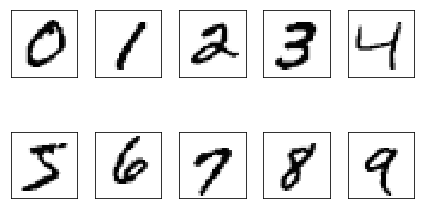

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = X_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

We should now see a plot of the 2 x 5 subfigures showing a representative image of each unique digit. 

In addition, let's also plot multiple examples of the same digit to see how different the handwritting really is:

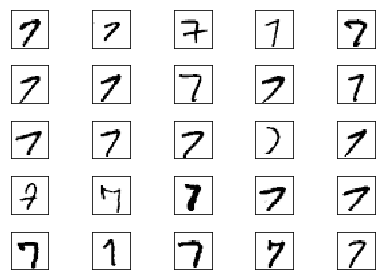

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train==7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

After executing the code, we should now see the first 25 variantes of the digit 7. 

After we have gone through all the previous steps, it is a good idea to save the scaled images in a format that we can load more quickly into a new Python session to avoid the overhead of reading in and processing the data again. When we are working with NumPy arrays, an efficient yet most convenient method to save multidimensional arrays to disk is NumPy's *savez* function. 

In short, the *savez* function is analogous to Python's *pickle* module that we used before, but optimized for storing NumPy arrays. The *savez* function produces zipped archives of our data, producing *.npz* files that contain files in the *.npz* format. Further, instead of using *savez*, we will use *savez_compressed*, which uses the same syntax as *savez*, but further compresses the output file down to substantially smaller file sizes. The following code snippet will save both the training and test datasets to the archive file *'mnist_scaled.npz'*:

In [10]:
import numpy as np

np.savez_compressed('mnist_scaled.npz', 
                    X_train=X_train, 
                    y_train=y_train, 
                    X_test=X_test, 
                    y_test=y_test)

After we created the *.npz* files, we can load the preprocessed MNIST images arrays using NumPy's *load* function as follows:

In [11]:
mnist = np.load('mnist_scaled.npz')

The *mnist* variable now references to an object that can access the four data arrays as we provided them keywork arguments to the *savez_compressed* function, which are listed under the files attribute list of the *mnist* object:

In [12]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

For instance, to load the training data into our current Python session, we will access the *'X_train'* array as follows (similar to a Python dictionary):

In [13]:
X_train = mnist['X_train']

Using a list comprehension, we can retrieve all four data arrays as follows:

In [14]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

Note that while the preceding *np.savez_compressed* and *np.load* examples are not essential for executing the code at this chapter, it serves as a demonstration of how to save and load NumPy arrays conveniently and efficiently. 